# Exploratory Data Analysis (EDA)

In [2]:
from pathlib import Path
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Dataset

Create manually a paths.csv file in /data that contains on each the absolute path to a dataset:\
DatasetName,PathToDataset

The csv is read in

In [3]:
paths_to_data = {}

with open('data/paths.csv', newline='') as csvfile:
    pathsreader = csv.reader(csvfile, delimiter=';')
    for row in pathsreader:
        paths_to_data[row[0]] = Path(row[1])

Set paths

In [17]:
path_cityscapes = paths_to_data["Cityscapes"]
path_cityscapes_leftImg8bit = path_cityscapes / 'leftImg8bit_trainvaltest (11GB)' / 'leftImg8bit'
path_cityscapes_rightImg8bit = path_cityscapes / 'rightImg8bit_trainvaltest (11GB)' / 'rightImg8bit'
path_cityscapes_disparity = path_cityscapes / 'disparity_trainvaltest (3.5GB)' / 'disparity'

path_train = path_cityscapes_leftImg8bit / 'train'
path_val = path_cityscapes_leftImg8bit / 'val'
path_test = path_cityscapes_leftImg8bit / 'test'

### Number of images

In [5]:
def explore_set(path_set):
    """
    Returns a dataframe with the cities and number of images for each city 
    for the given dataset
    
    Args:
        path_set: path to the dataset split
        
    Returns:
        A pandas dataframe with two columns:
        - Cities
        - Number of images
    """

    cities = [x.stem for x in path_set.iterdir() if x.is_dir()]
    number_of_images = []

    for city in cities:
        path_city = path_set / city
        number_of_images.append(len(list(path_city.glob('*.png'))))

    dict = {'City': cities, 'Number of images': number_of_images}
    df = pd.DataFrame(dict)

    return df

In [6]:
df_num_cities_train = explore_set(path_train)
df_num_cities_val = explore_set(path_val)
df_num_cities_test = explore_set(path_test)

In [7]:
print('Total number of images:')
print("Training set: ", df_num_cities_train['Number of images'].sum())
print("Validation set: ", df_num_cities_val['Number of images'].sum())
print("Test set: ", df_num_cities_test['Number of images'].sum())

Total number of images:
Training set:  2975
Validation set:  500
Test set:  1525


In [8]:
import tabulate

In [9]:
print(df_num_cities_train.to_markdown(index=False,tablefmt="github"))
print()
print(df_num_cities_val.to_markdown(index=False,tablefmt="github"))
print()
print(df_num_cities_test.to_markdown(index=False,tablefmt="github"))

| City            |   Number of images |
|-----------------|--------------------|
| aachen          |                174 |
| bochum          |                 96 |
| bremen          |                316 |
| cologne         |                154 |
| darmstadt       |                 85 |
| dusseldorf      |                221 |
| erfurt          |                109 |
| hamburg         |                248 |
| hanover         |                196 |
| jena            |                119 |
| krefeld         |                 99 |
| monchengladbach |                 94 |
| strasbourg      |                365 |
| stuttgart       |                196 |
| tubingen        |                144 |
| ulm             |                 95 |
| weimar          |                142 |
| zurich          |                122 |

| City      |   Number of images |
|-----------|--------------------|
| frankfurt |                267 |
| lindau    |                 59 |
| munster   |                174 |

| C

In [10]:
df_num_cities_train['Set'] = 'train'
df_num_cities_val['Set'] = 'val'
df_num_cities_test['Set'] = 'test'

df_num_cities_all = pd.concat([df_num_cities_train, df_num_cities_val, df_num_cities_test], ignore_index=True)

In [11]:
sorter = ['train', 'val', 'test']
df_num_cities_all.Set = df_num_cities_all.Set.astype("category")
df_num_cities_all.Set = df_num_cities_all.Set.cat.set_categories(sorter)

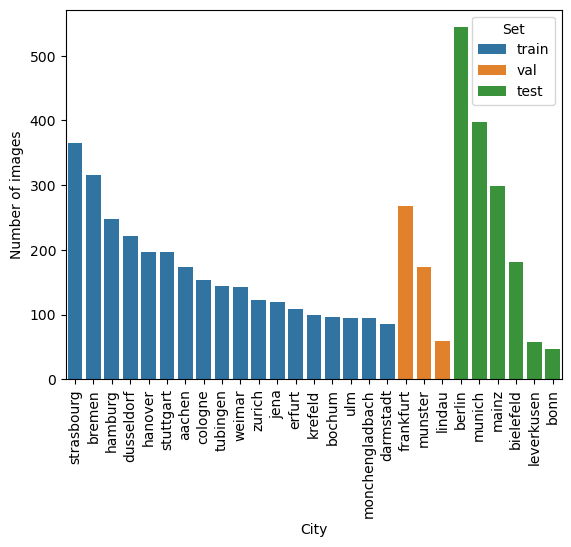

In [12]:
sns.barplot(
    data=df_num_cities_all.sort_values(['Set', 'Number of images'],ascending=[True, False]),
    x='City',
    y='Number of images',
    hue='Set')
plt.xticks(rotation=90);

### Sample Image

In [13]:
MAX_HEIGHT = 150

def calculate_new_size(image, max_height):
    """
    """
    width = image.size[0]
    height = image.size[1]

    ratio = max_height / height

    new_width = int(ratio * width)
    new_height = int(max_height)

    return (new_width, new_height)


Format: PNG
Mode: RGB
Size: (2048, 1024)


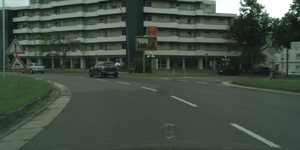

In [14]:
path_example_image = path_train / 'aachen' / 'aachen_000000_000019_leftImg8bit.png'
example_image = Image.open(path_example_image)

print("Format:", example_image.format)
print("Mode:", example_image.mode)
print("Size:", example_image.size)
# print("", example_image. )

new_size = calculate_new_size(example_image, MAX_HEIGHT)
example_image.resize(new_size)

Format: PNG
Mode: RGB
Size: (2048, 1024)


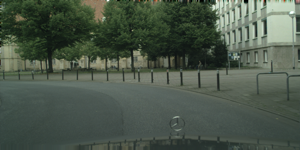

In [15]:
path_example_image_2 = path_train / 'hanover' / 'hanover_000000_019116_leftImg8bit.png'
example_image_2 = Image.open(path_example_image_2)

print("Format:", example_image_2.format)
print("Mode:", example_image_2.mode)
print("Size:", example_image_2.size)
# print("", example_image. )

new_size = calculate_new_size(example_image_2, MAX_HEIGHT)
example_image_2.resize(new_size)

### Disparity

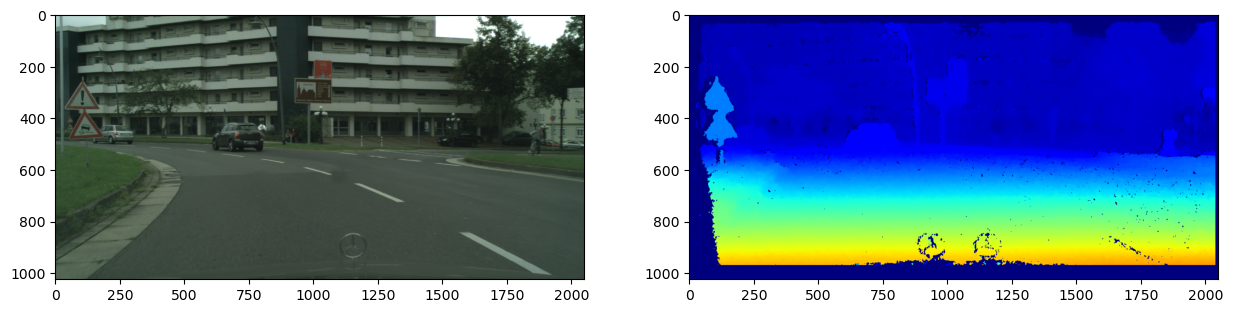

In [20]:
path_example_disparity = path_cityscapes_disparity / 'train' / 'aachen' / 'aachen_000000_000019_disparity.png'
example_disparity = Image.open(path_example_disparity)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(example_image)
ax[1].imshow(example_disparity, cmap='jet')